# Neural Network with Tensorflow + Keras

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
train_datagen=ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

test_datagen = ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies


image_size = (128,128)
batch_size = 10

training_data_dir = r'C:\Users\Karin\Desktop\ML\Final Project\CheckData'
validation_data_dir = r'C:\Users\Karin\Desktop\ML\Final Project\CheckDataTest'

train_generator=train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=image_size,
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator = test_datagen.flow_from_directory(
                                        validation_data_dir,
                                         target_size=image_size,
                                         color_mode='rgb',
                                        class_mode = "categorical")

Found 2317 images belonging to 5 classes.
Found 260 images belonging to 5 classes.


In [3]:
x_batch, y_batch = next(train_generator)

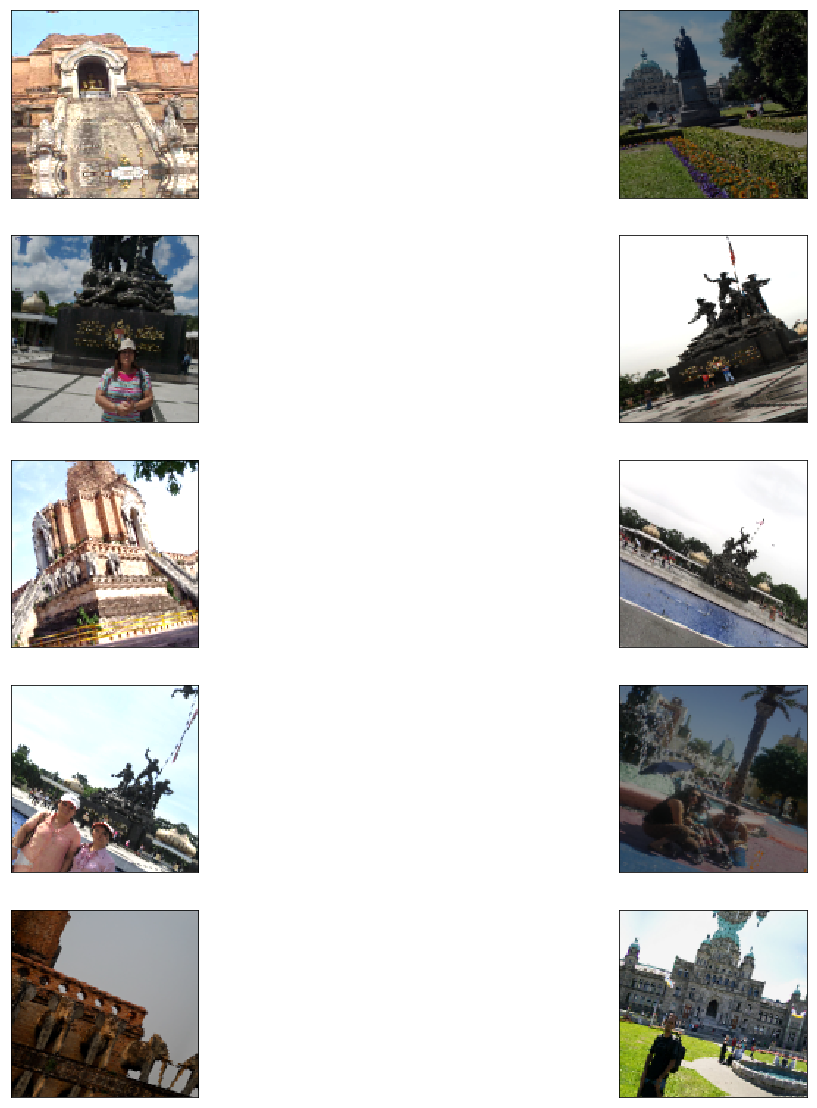

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = x_batch[i]
    image= image.astype(int)
    plt.imshow(image)

In [5]:
model = Sequential()
print ("A")
model.add(Conv2D(64, (3,3), input_shape = (image_size[0], image_size[1], 3)))
print("B")
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

A
Instructions for updating:
Colocations handled automatically by placer.
B


In [6]:
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatening the data
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#output layer
model.add(Dense(5))
model.add(Activation('softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
__________

In [8]:
adamOptimizer = tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
model.fit(x_batch, y_batch, batch_size=32, epochs = 3, validation_split=0.1, callbacks=[TrainValTensorBoard(write_graph=False)])

NameError: name 'TrainValTensorBoard' is not defined

In [110]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)

231


# Training a conv network with the data

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import pickle

In [93]:
train_loss, train_acc = model.evaluate(X,Y)

2317/2317 [==============================] - 6s 3ms/sample - loss: 0.2497 - acc: 0.9258


# Using TensorBoard

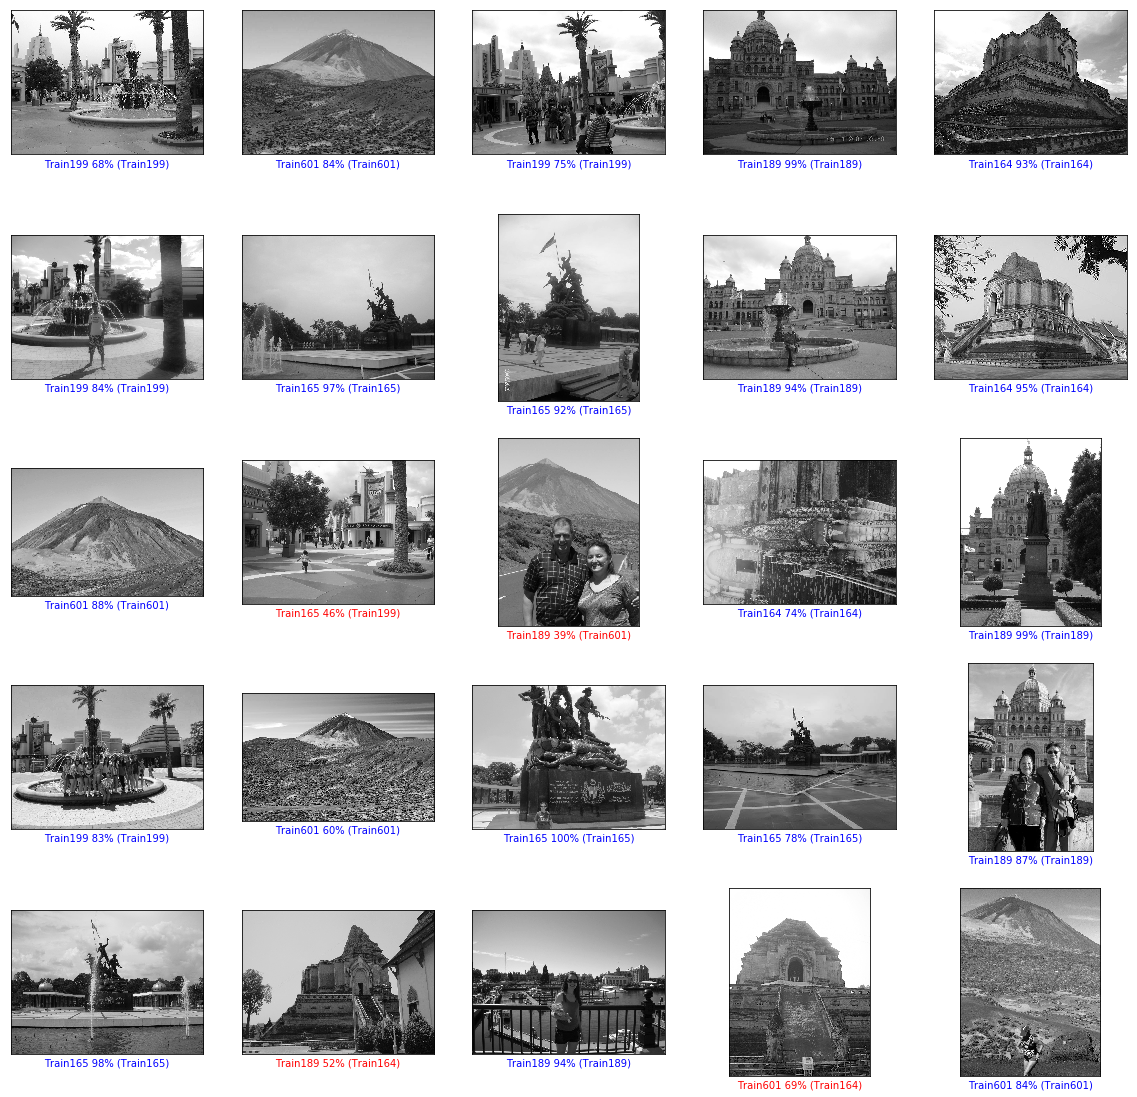

In [96]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(CATEGORIES[predicted_label],
                                100*np.max(predictions_array),
                                CATEGORIES[true_label]),
                                color=color)

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions, test_labels, [pair[0] for pair in testPairs])

In [97]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [98]:
train_loss, train_acc = model.evaluate(X,Y)

2317/2317 [==============================] - 6s 3ms/sample - loss: 0.2497 - acc: 0.9258 1s - loss: 0.2


In [99]:
print("loss: ",train_loss, "acc: ",  train_acc)

loss:  0.24966312746164043 acc:  0.92576605


In [100]:
print ("Yayyyyyy")

Yayyyyyy
